In [8]:
%autosave 10
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_precision_recall_curve , precision_recall_curve , roc_auc_score , auc

Autosaving every 10 seconds


In [2]:
import warnings
warnings.filterwarnings("ignore")

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
os.chdir("D:\DataScience\Technocolabs\miniproject_2")
df = pd.read_csv("cleaned_data.csv")
x = df[["LIMIT_BAL"]]
x_1 = df[["EDUCATION"]]
y = df[["default payment next month"]]

In [4]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=124,test_size=0.25)
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(x_1,y,random_state=124,test_size=0.25)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [5]:
lr = LogisticRegression()
lr_1 = LogisticRegression()
lr.fit(X_train,y_train)# Limit balance
lr_1.fit(X_train_1,y_train_1)# for Education column

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [6]:
pred_prob = lr.predict_proba(X_test)
pred_prob_1 = lr_1.predict_proba(X_test_1)
y_pre = lr.predict(X_test)
y_pre_1 = lr_1.predict(X_test_1)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [9]:
# for Limit balance
roc_auc = metrics.roc_auc_score(y_test,pred_prob[:,1])
roc_auc

0.6181269086962914

In [10]:
# for education
roc_auc_1 = metrics.roc_auc_score(y_test_1,pred_prob_1[:,1])
roc_auc_1

0.5300476049418794

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

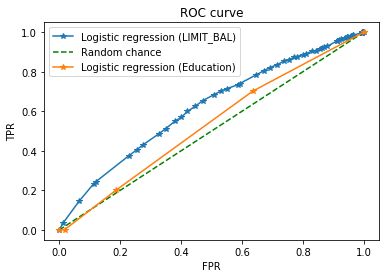

In [11]:
fpr, tpr, thresholds = roc_curve(y_test,pred_prob[:,1])
fpr2, tpr2, threshold2 = roc_curve(y_test_1,pred_prob_1[:,1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'g--')
plt.plot(fpr2, tpr2, '*-')
plt.legend(['Logistic regression (LIMIT_BAL)', 'Random chance' , 'Logistic regression (Education)' ])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [12]:
precision,recall,threshold = metrics.precision_recall_curve(y_test,pred_prob[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision-Recall-Curve')

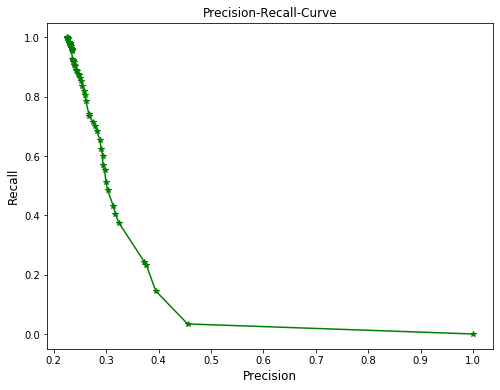

In [13]:
plt.figure(figsize=(8,6))
plt.plot(precision,recall,"g*-")
plt.xlabel("Precision",fontsize=12)
plt.ylabel("Recall",fontsize=12)
plt.title("Precision-Recall-Curve",fontsize=12)

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [14]:
area = metrics.auc(recall,precision)
area

0.3283321362627134

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [15]:
train_pred_prob = lr.predict_proba(X_train)
roc_auc = metrics.roc_auc_score(y_train,train_pred_prob[:,1])
roc_auc

0.618855458158596

    How is this different, conceptually and quantitatively, from your earlier calculation?
